## Observations and Insights 
## Background:
Data analysis on the potential treatments for Squamous Cell Carcinoma (SCC), a common variant of skin cancer.
In this study, 249 mice with a malignant SCC tumor were given a variety of drug regimens. Tumor development was observed and measured over 45 days. The study compares the performance of the current pharmaceutical, Capomulin, with alternate treatment regimens. 
## Observations and insights:
* Male and female mice sub-populations were near proportionate, with 51% of the study population male, and 49% of the study population female. Checking the efficacy of Capomulin on the basis of gender provides additional insight.

* Upon analysis of the tumor volumes of the mice across four regimens of interest, drugs Capomulin and Remicane appear to have similar degrees of effectiveness.

  * The data seem to be well behaving with only one outlier for Infubinol as shown in the Box Plot display.

* After comparing the line plot of tumor volume and time point for a mouse treated with Capomulin, it is evident that the average tumor volume has reduced over the 45 day period. Capomulin is effective. A possible extension to the study could be increasing the number of mice tested. If the number of mice tested increased, the presence of some with no tumor would be likely. It is worth noting that nearly all mice that I tested in the current pool showed significant progression after the treatment.
  * It would be intriguing to observe the progression of the tumors ensuing an extension of this study past 45 days.

* There is a strong correlation (0.840) between weight to average tumor volume.
Therefore, there is a strong relationship between the weight of the mice to their tumor volume.






In [27]:
%matplotlib inline

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from matplotlib import cm

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouse_study_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how='left')

# Display the data table for preview
combine_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice.
orig_data_no_of_mice = combine_mouse_study_data["Mouse ID"].nunique()
print(f"\n    Total number of mice : {orig_data_no_of_mice}")


    Total number of mice : 249


In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_group = combine_mouse_study_data.groupby(["Mouse ID"])
mouse_study_group = pd.DataFrame(mouse_study_group["Timepoint"].value_counts())
mouse_study_group = mouse_study_group.rename(columns={"Timepoint":"Timepoint count"})

mouse_study_group = mouse_study_group.reset_index()
mouse = mouse_study_group.loc[(mouse_study_group["Timepoint count"] > 1)]
mouseID = mouse["Mouse ID"].unique() # Array contaning duplicate mouseID(s).


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_Mouse_Data = pd.DataFrame(combine_mouse_study_data.loc[combine_mouse_study_data["Mouse ID"].isin(mouseID)])
Dup_Mouse_Data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_Mouse_Data = combine_mouse_study_data.set_index("Mouse ID")
clean_Mouse_Data.drop(mouseID, inplace=True)
clean_Mouse_Data = clean_Mouse_Data.reset_index()
clean_Mouse_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = clean_Mouse_Data["Mouse ID"].nunique()
print(f"\n    Total number of mice in the clean DataFrame : {no_of_mice}")


    Total number of mice in the clean DataFrame : 248


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_Mouse_Data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
avg_tumor_volume = regimen_group["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_group["Tumor Volume (mm3)"].median()
variance_tumor_volume = regimen_group["Tumor Volume (mm3)"].var()
std_tumor_volume = regimen_group["Tumor Volume (mm3)"].std() 

#SEM unbiased standard error of the mean over requested axis 
SEM_tumor_volume = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
data = {
    "Avg TumorVolume":avg_tumor_volume,
    "Med TumorVolume":median_tumor_volume,
    "Var TumorVolume":variance_tumor_volume,
    "Std TumorVolume":std_tumor_volume,
    "SEM TumorVolume":SEM_tumor_volume
}
tumor_vol_summary_df = pd.DataFrame(data)
tumor_vol_summary_df


,Avg TumorVolume,Med TumorVolume,Var TumorVolume,Std TumorVolume,SEM TumorVolume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sin_line_tumor_vol_summary_df = regimen_group.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
sin_line_tumor_vol_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [35]:

# Data grouped by "Drug Regimen" for the following bar charts. Using data from clean mouse data 
timepoints_for_drug_regimen = clean_Mouse_Data.groupby(["Drug Regimen"]).count()
drug_regimen_count = len(timepoints_for_drug_regimen)

# Plot variables
x_axis = timepoints_for_drug_regimen.index
y_axis = timepoints_for_drug_regimen["Timepoint"]

x_label  ="Drug Regimen"
y_label  ="Total Timepoints"
graph_title   ="Timepoints for all mice tested for each drug regimen"

x_lim = (-0.75,drug_regimen_count-0.25)
y_lim = (0,max(y_axis)+50)
x_ticks = np.arange(drug_regimen_count)
tick_angle = 90

fsize = (8,5)
# using matplotlib colormap
bar_color = cm.ocean_r(np.linspace(.4, .8, len(x_axis)))
bar_alpha =0.9
bar_width = 0.40


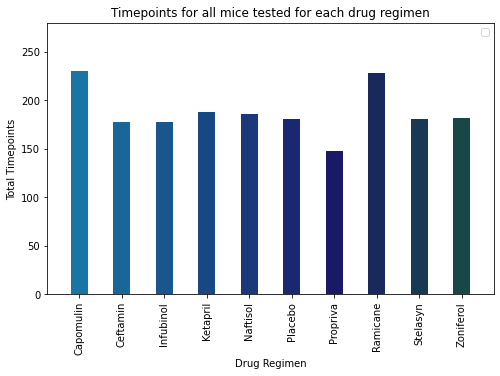

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas (pandas.DataFrame.plot())

# plotting bar chart using pandas.DataFrame.plot 
# size, title and labels

timepoints_ax = timepoints_for_drug_regimen.plot(kind="bar",y=['Timepoint'], figsize=fsize, title=graph_title, xlabel=x_label, ylabel=y_label, color=[bar_color], alpha=bar_alpha, width=bar_width, fontsize=10, align="center")

# Hide Legend 
timepoints_ax.legend("")

# x and y lims
timepoints_ax.set_xlim(x_lim)
timepoints_ax.set_ylim(y_lim)

# Ticks
timepoints_ax.set_xticks(x_ticks)
timepoints_ax.tick_params(axis="x",rotation=tick_angle)

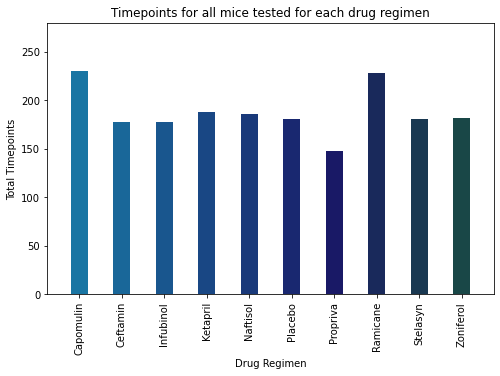

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# using pyplot (matplotlib.pyplot)

# Plot Size
plt.figure(figsize=fsize)

# plotting bar chart using matplotlib.pyplot
plt.bar(x_axis, y_axis, width=bar_width, color=bar_color, alpha=bar_alpha, align="center")

# x and y lims
plt.xlim(x_lim)
plt.ylim(y_lim)

# labels and title
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)

# Ticks
plt.xticks(x_ticks,x_axis,rotation=tick_angle)

# Display
plt.show()

In [37]:
# Generate pie plots showing the distribution of female versus male mice
# Dataframe for distribution of female versus male mice using the Clean Dataframe because we dont want to count the mice had corrupt data and were dropped at the begining 
#if we were to  incude the corrupt mouse , use this dataframe instead :
#mice_gender_group = pd.DataFrame(combine_mouse_study_data["Sex"].value_counts())

mice_gender_group = pd.DataFrame(clean_Mouse_Data["Sex"].value_counts())
mice_gender_group

,Sex
Male,958
Female,922


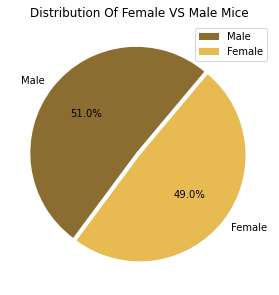

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.DataFrame.plot()

# Variables
# Colors using matplotlib colormap
colors = cm.tab20b(np.linspace(.4, .8, 4))

# size and explode 
fsize = (4,5)
explode = (0.04,0)
pie_title="Distribution Of Female VS Male Mice"

#angle and display format
start_angle  = 50
disp_format = "%.1f%%"


# plotting pie chart using pandas.DataFrame.plot 
mice_gender_group.plot(kind="pie", y='Sex', figsize=fsize, title=pie_title, ylabel="", colors=colors, explode=explode, startangle=start_angle, autopct=disp_format)

plt.tight_layout()
plt.show()


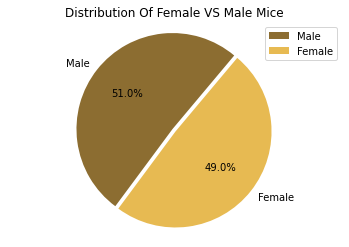

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (matplotlib.plot)

no_of_mice = mice_gender_group["Sex"]
labels = mice_gender_group.index


# matplotlib to create a pie chart based upon the above data
plt.pie(no_of_mice, explode=explode, colors=colors, labels=labels, startangle=start_angle, autopct=disp_format)

# Create axes which are equal so we have a perfect circle
plt.axis('equal')

# title and legend
plt.title(pie_title)
plt.legend(labels)

# Display
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
pt_mouse_data = clean_Mouse_Data.loc[clean_Mouse_Data["Drug Regimen"].isin(promising_treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse
pt_mouce_max_timepoint = pd.DataFrame(pt_mouse_data.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pt_mouse_tumor_vol = pd.merge(pt_mouce_max_timepoint,clean_Mouse_Data, on = ["Mouse ID","Timepoint"], how="left")
pt_mouse_tumor_vol = pt_mouse_tumor_vol[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]#.sort_values(by=["Drug Regimen"])
pt_mouse_tumor_vol

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Infubinol,a203,67.973419
1,Infubinol,a251,65.525743
2,Ceftamin,a275,62.999356
3,Ramicane,a411,38.407618
4,Ramicane,a444,43.047543
...,...,...,...
95,Ceftamin,y769,68.594745
96,Capomulin,y793,31.896238
97,Ceftamin,y865,64.729837
98,Ramicane,z578,30.638696


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = list(pt_mouse_tumor_vol["Drug Regimen"].unique())
treatments = promising_treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug_regimen in treatments:
     tumor_vol_per_drug = pt_mouse_tumor_vol.loc[pt_mouse_tumor_vol["Drug Regimen"] == drug_regimen]["Tumor Volume (mm3)"]
     tumor_vol_per_drug = tumor_vol_per_drug.sort_values()
     tumor_vol_per_drug
     
     # add subset 
     tumor_vol_list.append(list(tumor_vol_per_drug))
     
     # Determine outliers using upper and lower bounds
     quartiles_var = tumor_vol_per_drug.quantile([.25,.5,.75]).round(2)
     lowerq = quartiles_var[.25].round(2)
     upperq = quartiles_var[.75].round(2)
     iqr = round((upperq-lowerq),2)

     lowerb = round((lowerq - (1.5*iqr)),2)
     upperb = round((upperq + (1.5*iqr)),2)

     # Print Results for each treatment
     print(f'\nIQR data for {drug_regimen} :')
     print('------------------------------------------------------------------')
     
     print(f'The lower quartile : {lowerq}')
     print(f'The upper quartile : {upperq}')

     print(f"The interquartile range : {iqr}")
     print(f"The median : {quartiles_var[0.5]} ")

     lower_bound = round((lowerq - (1.5*iqr)),2)
     upper_bound = round((upperq + (1.5*iqr)),2)
     print(f"Values below {lower_bound} could be outliers.")
     print(f"Values above {upper_bound} could be outliers.")  

     #Print outliers if any
     outliers = pt_mouse_tumor_vol.loc[(pt_mouse_tumor_vol["Drug Regimen"] == drug_regimen) & ((pt_mouse_tumor_vol["Tumor Volume (mm3)"] < lowerb )|(pt_mouse_tumor_vol["Tumor Volume (mm3)"] > upperb))]
     if len(outliers) >= 1:
          print(f"\n{drug_regimen} has following outlier Tumor Volume(s) : ")
          print (outliers.head())
     else:
          print(f"{drug_regimen} has no outlier Tumor Volume(s)")   


IQR data for Capomulin :
------------------------------------------------------------------
The lower quartile : 32.38
The upper quartile : 40.16
The interquartile range : 7.78
The median : 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Capomulin has no outlier Tumor Volume(s)

IQR data for Ramicane :
------------------------------------------------------------------
The lower quartile : 31.56
The upper quartile : 40.66
The interquartile range : 9.1
The median : 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Ramicane has no outlier Tumor Volume(s)

IQR data for Infubinol :
------------------------------------------------------------------
The lower quartile : 54.05
The upper quartile : 65.53
The interquartile range : 11.48
The median : 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

Infubinol has following outlier Tumor Volume(s) : 
   Drug Regimen Mouse ID  Tumor Volume (mm3)
1

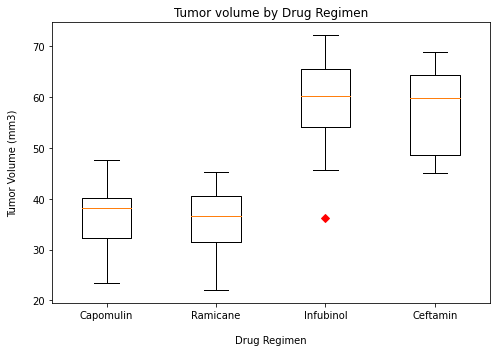

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Tumor volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen', labelpad=15)
ax1.set_ylabel('Tumor Volume (mm3)', labelpad=15)
ax1.boxplot(tumor_vol_list,labels=treatments,notch=False,sym='rD')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Getting Single mouse data for mouse treated with Capomulin
drug_treatment = "Capomulin"
mouse_id = "b128"               #"s185" #"i557" #"b128""x401"
cap_single_mouse_data = clean_Mouse_Data.loc[(clean_Mouse_Data["Drug Regimen"]==drug_treatment) & (clean_Mouse_Data["Mouse ID"]==mouse_id)]
cap_single_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


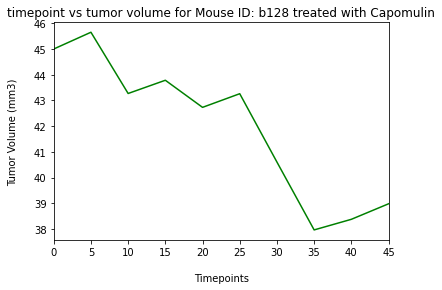

In [44]:
# a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(6,4))
plt.plot(cap_single_mouse_data['Timepoint'],cap_single_mouse_data['Tumor Volume (mm3)'],color="green")
plt.xlabel("Timepoints", labelpad=16)
plt.ylabel("Tumor Volume (mm3)", labelpad=16)
min_x_lim = cap_single_mouse_data["Timepoint"].min()
max_x_lim = cap_single_mouse_data["Timepoint"].max()
plt.xlim(min_x_lim,max_x_lim)
plt.title ("timepoint vs tumor volume for Mouse ID: "+mouse_id + " treated with Capomulin")
plt.show()

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Dataframe with data just for Capomulin regimen 
drug_treatment = "Capomulin"
cap_mouse_data = clean_Mouse_Data.loc[clean_Mouse_Data["Drug Regimen"]==drug_treatment]

# Group Dataframe by Mouse ID
cap_mouse_data_mean = cap_mouse_data.groupby(["Mouse ID"])

# Get Averages by using agg and NamedAgg
cap_mouse_data_mean=pd.DataFrame(cap_mouse_data_mean.agg(avg_tumvol=pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc="mean"),avg_weight=pd.NamedAgg(column="Weight (g)", aggfunc="mean")))
cap_mouse_data_mean=cap_mouse_data_mean.reset_index()
cap_mouse_data_mean.head(8)

,Mouse ID,avg_tumvol,avg_weight
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23


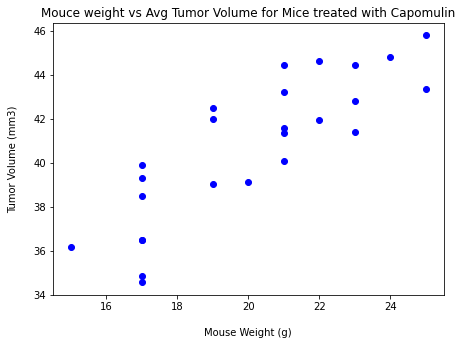

In [46]:
# scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.figure(figsize=(7,5))
plt.scatter(cap_mouse_data_mean["avg_weight"],cap_mouse_data_mean["avg_tumvol"],color="blue")

plt.xlabel("Mouse Weight (g)", labelpad=16)
plt.ylabel("Tumor Volume (mm3)", labelpad=16)

plt.title ("Mouce weight vs Avg Tumor Volume for Mice treated with Capomulin")
plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
mouse_weight = cap_mouse_data_mean["avg_weight"]
tum_vol  = cap_mouse_data_mean["avg_tumvol"]
correlation = st.pearsonr(mouse_weight,tum_vol)
# Print
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84



The r-squared is: 0.7088568047708717
The equation of regression line is: y = 0.95x + 21.55



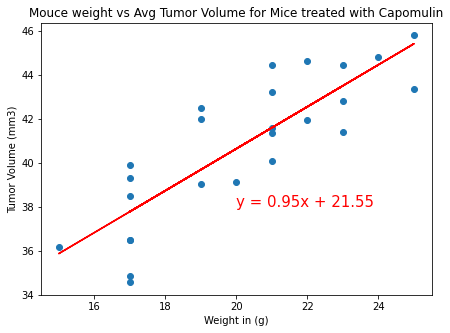

In [49]:
# Calculate linear regression model 

x_values = mouse_weight
y_values = tum_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

plt.xlabel('Weight in (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title ("Mouce weight vs Avg Tumor Volume for Mice treated with Capomulin")

# Print out the r-squared value along with the plot.
print(f"\nThe r-squared is: {rvalue**2}")
print(f"The equation of regression line is: {line_eq}\n")

plt.show()